<a href="https://colab.research.google.com/github/AkashRathod25/Deep-Learning-6-July/blob/main/2_Regression_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with Keras


In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### 1.Load Data

In [12]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### 1.Load Data Another way url way

In [13]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv"
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# 2.Perform basic Data Quality Check

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [15]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [16]:
df.duplicated().sum()  # If sum duplicate value are there then perform 2 step

41

In [17]:
df.duplicated().sum()/len(df)

0.004285117056856187

In [20]:
df = df.drop_duplicates(keep="first")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# 3.Seperate X and Y
drop-(PE)

In [24]:
X = df.drop(columns=["PE"])
Y = df["PE"]

In [28]:
X.head()     # Head show only starting 5 records

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [26]:
Y

0       480.48
1       445.75
2       438.76
3       453.09
4       464.43
         ...  
9563    462.59
9564    432.90
9565    465.96
9566    450.93
9567    451.67
Name: PE, Length: 9527, dtype: float64

# 4.Preprocess X using pipeline

In [30]:
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [32]:
num_pipe = Pipeline(steps=[("impute" , SimpleImputer (strategy = 'mean')),('scale' , StandardScaler())]).set_output(transform='pandas')

num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In [33]:
x_pre = num_pipe.fit_transform(X)
x_pre

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837
...,...,...,...,...
9563,-0.609648,-0.423583,-0.241925,-0.027724
9564,1.847362,1.864831,-0.494441,-0.932100
9565,-0.492776,-0.863450,0.162101,0.364561
9566,-0.269777,0.439598,0.899448,1.459261


# 5.Apply Train Test split


In [35]:
from sklearn.model_selection import train_test_split

xtrain , xtest , ytrain , ytest = train_test_split (x_pre , Y ,test_size=0.2 ,random_state=42 )

In [36]:
xtrain

,AT,V,AP,RH
5703,-0.152905,0.324507,0.089713,1.817999
7322,-1.497611,-1.153542,0.323712,0.908830
9105,-0.885038,-0.954892,0.293410,0.988245
6436,1.398679,1.223949,-0.479290,-1.082031
6790,-0.824586,-0.942279,0.796758,1.506499
...,...,...,...,...
5742,-0.109917,-1.064465,-1.356363,1.309330
5197,1.477937,1.535325,-1.701468,0.325538
5396,0.017702,-0.244640,-0.752007,1.464053
860,0.949996,1.146696,-0.418686,-0.445339


In [37]:
xtest

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599
...,...,...,...,...
3403,-2.138395,-1.505909,0.899448,1.746114
4214,0.240700,1.233408,-0.460772,0.604861
7085,0.962086,1.638591,-1.230104,-0.857477
2215,1.433606,1.266517,-1.097113,-0.207093


In [43]:
ytrain

5703    446.68
7322    483.54
9105    461.71
6436    437.38
6790    463.71
         ...  
5742    459.96
5197    430.00
5396    447.96
860     440.45
7292    451.14
Name: PE, Length: 7621, dtype: float64

In [42]:
ytest

1087    429.38
6319    485.29
8052    480.40
9524    452.30
4463    446.47
         ...  
3403    490.50
4214    443.31
7085    441.14
2215    438.47
4987    436.85
Name: PE, Length: 1906, dtype: float64

# Step 5: Build the neural network
Hidden Layer use relu as activation function

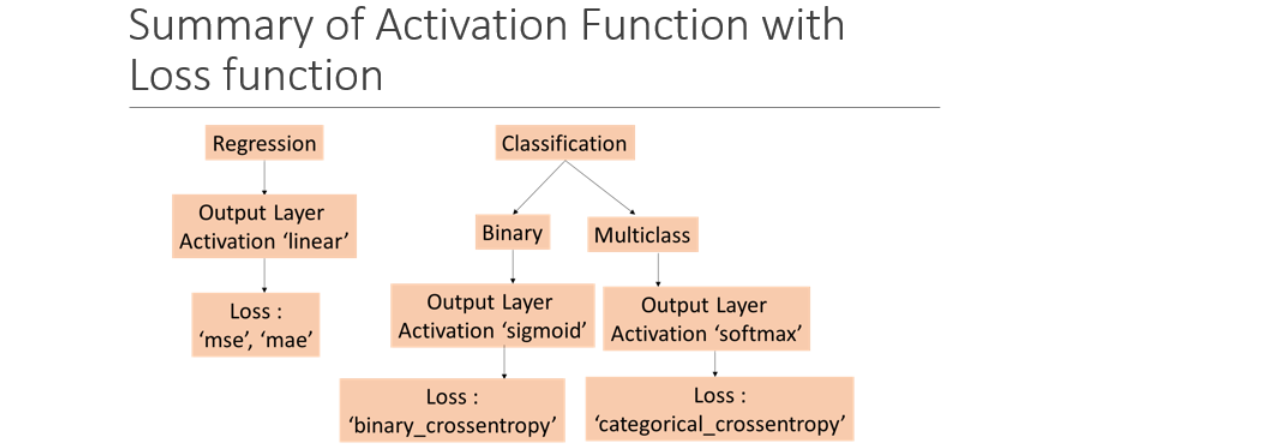

In [44]:
from keras.models import Sequential
from keras.layers import Dense , Input

In [49]:
# Intialize the model
model = Sequential()

# Add Input Layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add 2 Hidden Layer
model.add(Dense(16 , activation = 'relu'))
model.add(Dense(8 , activation = 'relu'))

# Add Output layer
model.add(Dense(1 , activation='linear'))

In [51]:
# Complie the model
model.compile(loss="mse" , metrics=["mae"] , optimizer="adam")

In [52]:
hist = model.fit(xtrain , ytrain , validation_data=(xtest , ytest) , epochs=60 )

Epoch 1/60
239/239 [==============================] - 4s 5ms/step - loss: 203952.5469 - mae: 451.3371 - val_loss: 198382.8750 - val_mae: 445.2154
Epoch 2/60
239/239 [==============================] - 1s 4ms/step - loss: 182092.4844 - mae: 426.3079 - val_loss: 158484.2344 - val_mae: 397.4211
Epoch 3/60
239/239 [==============================] - 1s 4ms/step - loss: 124470.0703 - mae: 347.1177 - val_loss: 89447.5469 - val_mae: 286.9344
Epoch 4/60
239/239 [==============================] - 2s 6ms/step - loss: 63453.1758 - mae: 229.7772 - val_loss: 43671.4180 - val_mae: 184.6773
Epoch 5/60
239/239 [==============================] - 2s 7ms/step - loss: 32051.0742 - mae: 154.7036 - val_loss: 23106.9922 - val_mae: 129.8419
Epoch 6/60
239/239 [==============================] - 1s 4ms/step - loss: 17831.2344 - mae: 112.2220 - val_loss: 13634.7217 - val_mae: 98.2964
Epoch 7/60
239/239 [==============================] - 1s 4ms/step - loss: 11268.5156 - mae: 89.1090 - val_loss: 8932.1289 - val_mae:

In [53]:
hist.history["loss"]

[203952.546875,
 182092.484375,
 124470.0703125,
 63453.17578125,
 32051.07421875,
 17831.234375,
 11268.515625,
 7451.0908203125,
 4692.9443359375,
 2880.46826171875,
 1811.5968017578125,
 1189.1729736328125,
 824.3992309570312,
 598.9830932617188,
 450.8313293457031,
 349.5408630371094,
 279.1172180175781,
 223.36753845214844,
 169.91519165039062,
 131.53501892089844,
 108.88626861572266,
 93.97515106201172,
 82.16175079345703,
 71.4726791381836,
 61.92706298828125,
 53.73750686645508,
 47.178855895996094,
 41.8139533996582,
 37.64411544799805,
 34.0174674987793,
 31.280611038208008,
 28.570344924926758,
 26.877689361572266,
 25.58201026916504,
 24.345325469970703,
 23.54488182067871,
 22.905874252319336,
 22.274877548217773,
 21.780471801757812,
 21.47888946533203,
 21.16385841369629,
 20.93728256225586,
 20.6019344329834,
 20.41800880432129,
 20.100603103637695,
 20.00698471069336,
 19.846817016601562,
 19.574609756469727,
 19.500524520874023,
 19.486553192138672,
 19.4356079101562

In [54]:
hist.history["val_loss"]

[198382.875,
 158484.234375,
 89447.546875,
 43671.41796875,
 23106.9921875,
 13634.7216796875,
 8932.12890625,
 5751.44970703125,
 3497.261962890625,
 2155.856689453125,
 1374.6951904296875,
 927.8984375,
 659.2593994140625,
 486.9259338378906,
 373.893310546875,
 296.6402893066406,
 239.57508850097656,
 189.23880004882812,
 141.97727966308594,
 115.67350769042969,
 99.07209014892578,
 86.74512481689453,
 76.1965560913086,
 66.04366302490234,
 57.5902214050293,
 49.779029846191406,
 43.75155258178711,
 39.322418212890625,
 34.89769744873047,
 32.267738342285156,
 29.242218017578125,
 27.39689826965332,
 26.72122573852539,
 24.633350372314453,
 23.824575424194336,
 23.183618545532227,
 22.26856803894043,
 21.966283798217773,
 22.63984489440918,
 21.098594665527344,
 20.626617431640625,
 20.641582489013672,
 20.257722854614258,
 20.056428909301758,
 19.74043083190918,
 19.515350341796875,
 20.062002182006836,
 19.39832305908203,
 19.42983627319336,
 20.249364852905273,
 19.0211772918701

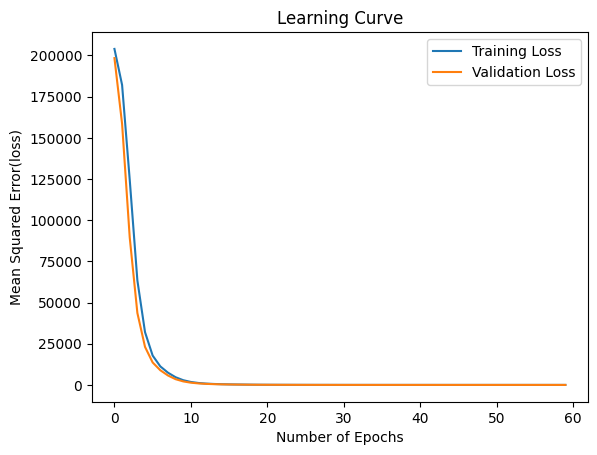

In [55]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"] , label="Training Loss")
plt.plot(hist.history["val_loss"] , label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error(loss)")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [57]:
model.evaluate(xtrain , ytrain)

239/239 [==============================] - 1s 2ms/step - loss: 18.5827 - mae: 3.3909


[18.582714080810547, 3.390859603881836]

In [58]:
model.evaluate(xtest , ytest)

60/60 [==============================] - 0s 7ms/step - loss: 18.4568 - mae: 3.4017


[18.456819534301758, 3.4016709327697754]

# Predict the results for train and test

In [59]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 2ms/step


In [61]:
ypred_train[0:5]

array([[449.83023],
       [480.06018],
       [469.0433 ],
       [433.44308],
       [466.58902]], dtype=float32)

In [63]:
ytrain.head()

5703    446.68
7322    483.54
9105    461.71
6436    437.38
6790    463.71
Name: PE, dtype: float64

In [62]:
ypred_test[0:5]

array([[430.03766],
       [482.7498 ],
       [485.0187 ],
       [449.96768],
       [445.35812]], dtype=float32)

In [64]:
ytest.head()

1087    429.38
6319    485.29
8052    480.40
9524    452.30
4463    446.47
Name: PE, dtype: float64

In [65]:
# R2 score in train
from sklearn.metrics import r2_score
r2_score(ytrain, ypred_train)


0.9353476108220606

In [66]:
# R2 score in test
r2_score(ytest, ypred_test)

0.9388421209524828

In [67]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/test_PowerPlant.csv"
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [68]:
num_pipe


Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In [69]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [70]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 [==============================] - 0s 5ms/step


array([[444.36966],
       [440.07764],
       [429.36856],
       [440.39755],
       [472.6792 ]], dtype=float32)

In [71]:
xnew["PowerOutput_pred"] = preds


xnew


,AT,V,AP,RH,PowerOutput_pred
0,22.49,58.82,1009.73,85.19,444.369659
1,28.88,54.89,1007.16,46.60,440.077637
2,27.89,73.21,1001.32,85.88,429.368561
3,25.69,62.26,1011.38,74.08,440.397552
4,12.16,40.81,1025.79,70.97,472.679199
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,437.041595
96,11.78,39.96,1011.37,82.95,473.457550
97,5.62,41.38,1020.91,86.21,485.811066
98,24.96,74.99,1008.25,80.52,436.241241


<Axes: xlabel='PowerOutput_pred', ylabel='Count'>

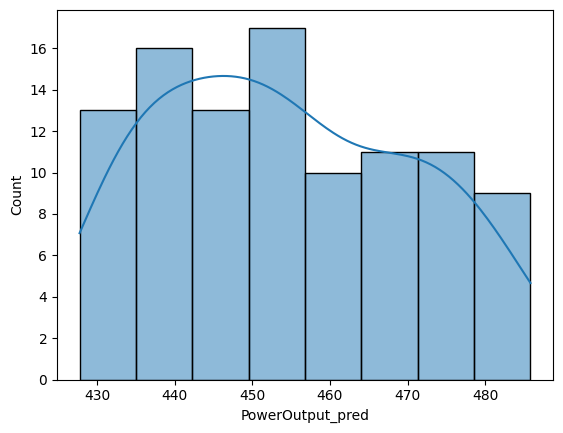

In [72]:
import seaborn as sns
sns.histplot(data=xnew, x="PowerOutput_pred", kde=True)

In [ ]:
xnew.to_csv("Results.csv", index=False)
